In [25]:
import pandas as pd 
import numpy as np 
import matplotlib as mpt


In [64]:
df1 = pd.read_csv('../../datasrc/NepseDataHistorical1997_2024.csv')

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6088 entries, 0 to 6087
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SN          6088 non-null   int64  
 1   open        6088 non-null   object 
 2   high        6088 non-null   object 
 3   low         6088 non-null   object 
 4   close       6088 non-null   object 
 5   change      6088 non-null   float64
 6   pct_change  6088 non-null   float64
 7   turnover    6088 non-null   object 
 8   date        6088 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 428.2+ KB


## After viewing the info we have to change the format of the above data and put data as the index

In [66]:
# Convert string columns with numeric data to float, handling non-numeric entries
numeric_cols = ['open', 'high', 'low', 'close', 'turnover']
for col in numeric_cols:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Convert the 'pct_change' column to float if it's not already, handling non-numeric entries
df1['pct_change'] = pd.to_numeric(df1['pct_change'], errors='coerce')

# Convert the 'date' column to datetime
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# Set the 'date' column as the index of the DataFrame
df1.set_index('date', inplace=True)

# Sort the DataFrame based on the index for time series analysis
df1.sort_index(inplace=True)

# Display the DataFrame info to confirm changes
df1.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6088 entries, 1997-07-20 to 2024-01-01
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SN          6088 non-null   int64  
 1   open        4069 non-null   float64
 2   high        4069 non-null   float64
 3   low         4069 non-null   float64
 4   close       4069 non-null   float64
 5   change      6088 non-null   float64
 6   pct_change  6088 non-null   float64
 7   turnover    4336 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 428.1 KB


C:\Users\hp\AppData\Local\Temp\ipykernel_35388\3153070690.py:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['date'] = pd.to_datetime(df1['date'], errors='coerce')


In [67]:
df1.head()

,SN,open,high,low,close,change,pct_change,turnover
date,,,,,,,,
1997-07-20,6088,173.26,173.26,173.26,173.26,0.0,0.0,0.0
1997-07-21,6087,173.25,173.25,173.25,173.25,0.0,0.0,0.0
1997-07-22,6086,173.03,173.03,173.03,173.03,0.0,0.0,0.0
1997-07-23,6085,172.68,173.03,173.03,173.03,0.0,0.0,0.0
1997-07-24,6084,172.66,172.66,172.66,172.66,0.0,0.0,0.0


### lets drop the sn form the data 

In [68]:
df1.drop('SN', axis=1, inplace=True)

In [69]:
df1.tail(1990)

,open,high,low,close,change,pct_change,turnover
date,,,,,,,
2015-05-24,910.0,910.0,910.0,910.0,-28.37,-3.02,0.0
2015-05-25,881.0,881.0,881.0,881.0,-29.29,-3.22,0.0
2015-05-26,860.0,860.0,860.0,860.0,-20.56,-2.33,0.0
2015-05-27,838.0,838.0,838.0,838.0,-22.14,-2.57,0.0
2015-05-28,842.0,842.0,842.0,842.0,4.13,0.49,0.0
...,...,...,...,...,...,...,...
2023-12-21,NaN,NaN,NaN,NaN,-32.77,-1.53,NaN
2023-12-24,NaN,NaN,NaN,NaN,-21.03,-0.99,NaN
2023-12-27,NaN,NaN,NaN,NaN,-17.23,-0.82,NaN


# Line plot for the closing price over time

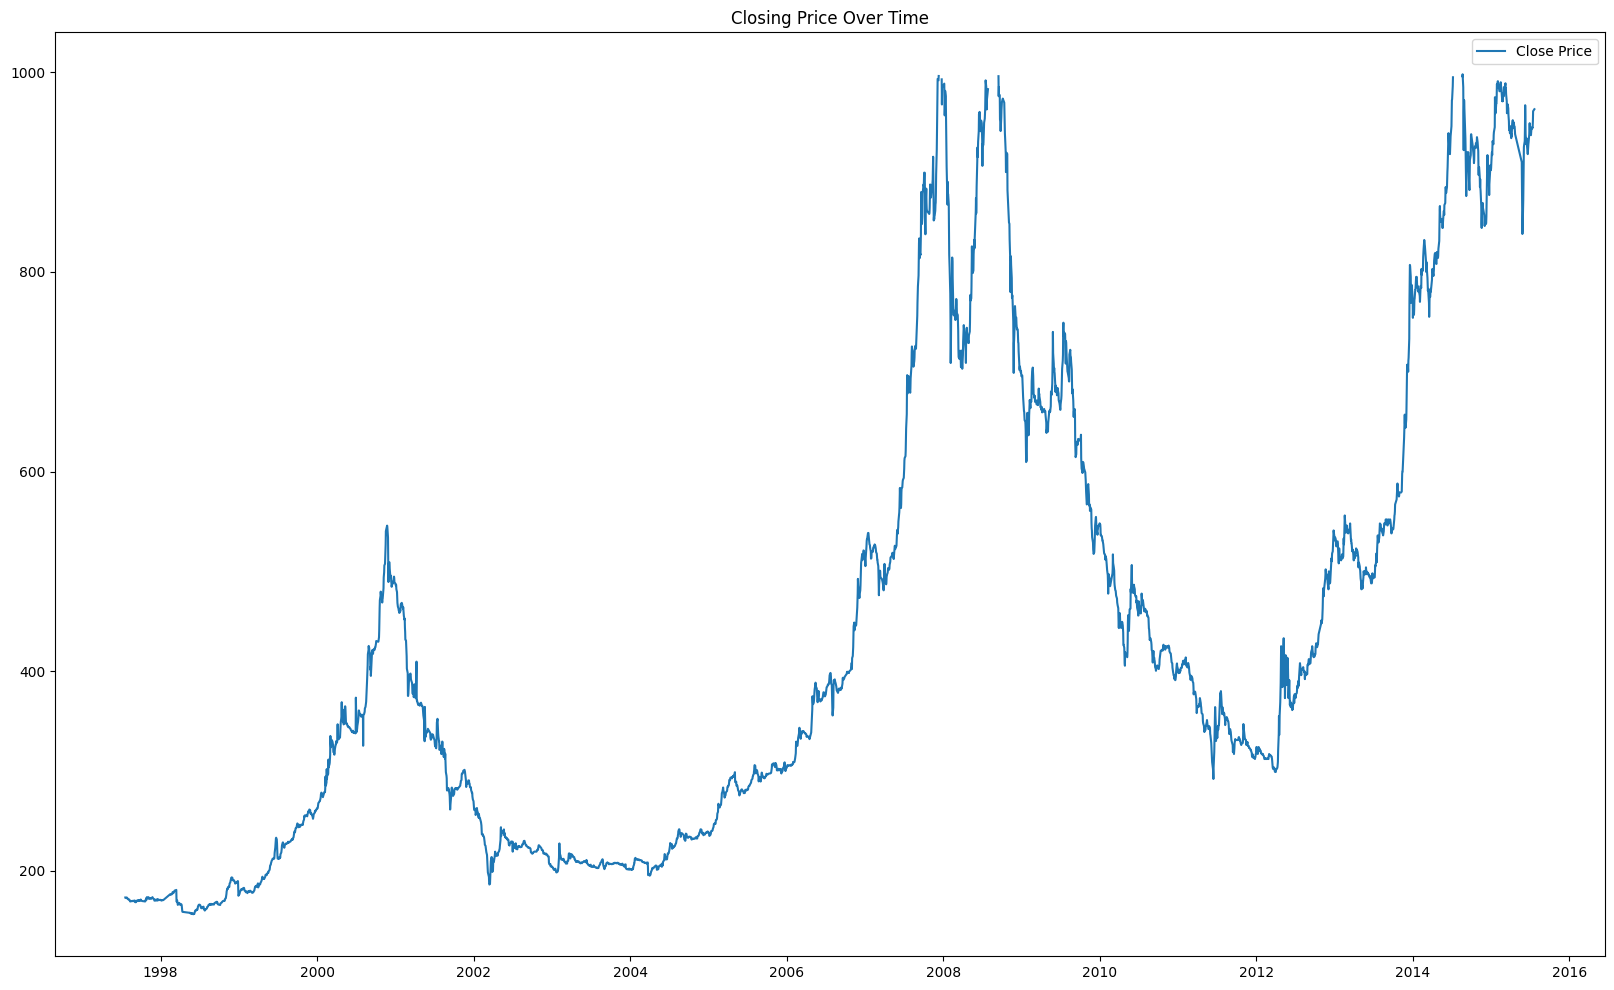

In [70]:


# importing the necessaries libraries 
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 12))
plt.plot(df1['close'], label='Close Price')
plt.title('Closing Price Over Time')
plt.legend()
plt.show()

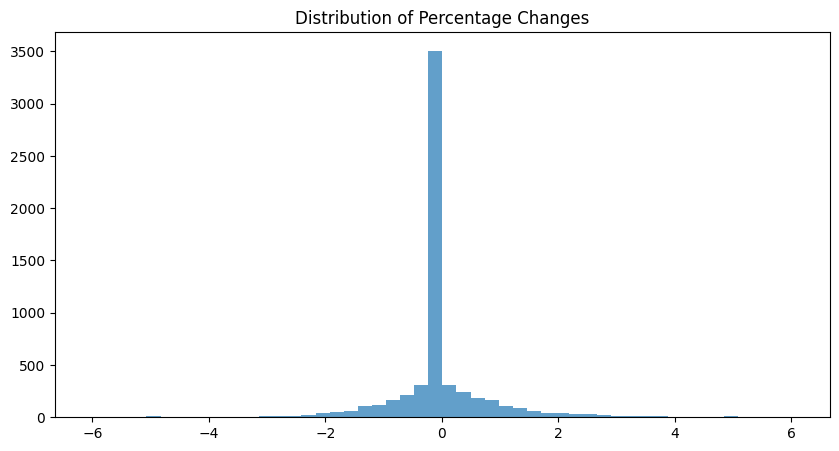

In [71]:
# Histogram for percentage changes
plt.figure(figsize=(10, 5))
plt.hist(df1['pct_change'].dropna(), bins=50, alpha=0.7)
plt.title('Distribution of Percentage Changes')
plt.show()

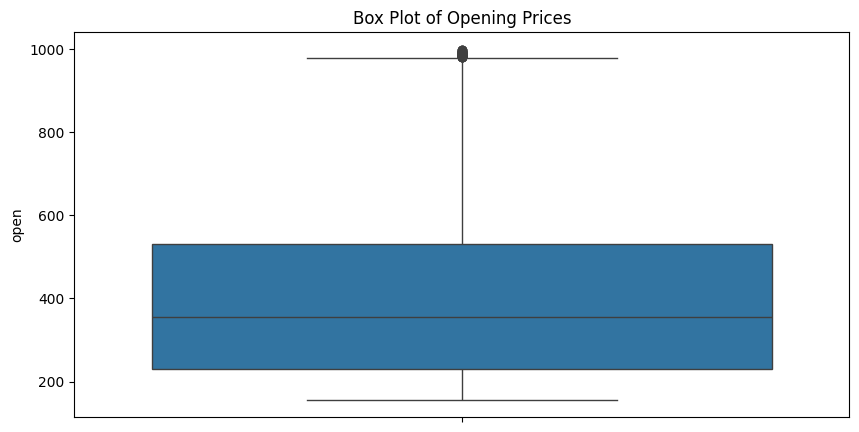

In [72]:
# Box plot for opening prices
plt.figure(figsize=(10, 5))
sns.boxplot(df1['open'])
plt.title('Box Plot of Opening Prices')
plt.show()

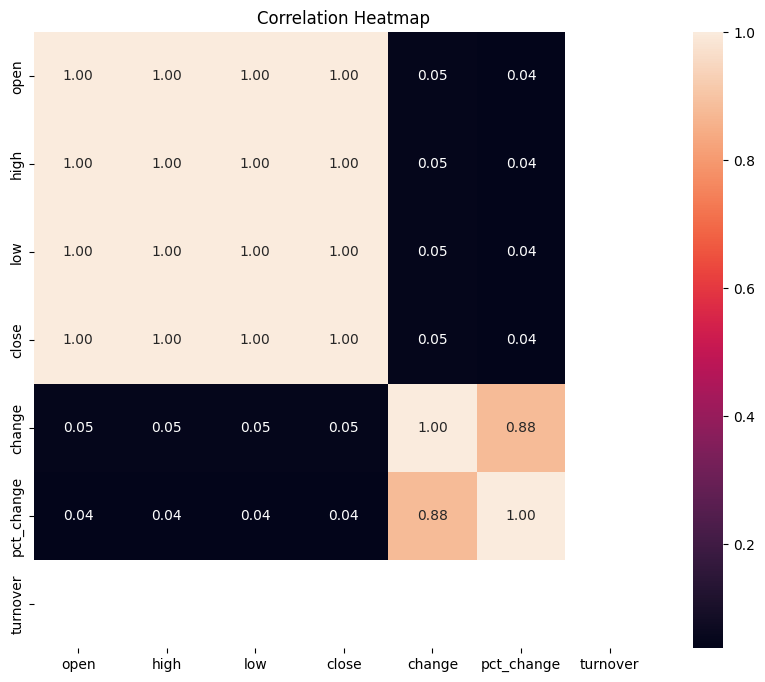

In [73]:
# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1400x700 with 0 Axes>

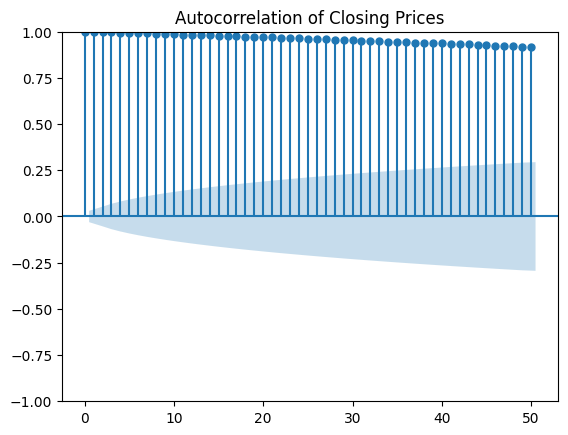

In [74]:
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelation plot for closing prices
plt.figure(figsize=(14, 7))
plot_acf(df1['close'].dropna(), lags=50)
plt.title('Autocorrelation of Closing Prices')
plt.show()


In [75]:
# i want to see only the data form the 2000 to 2024 

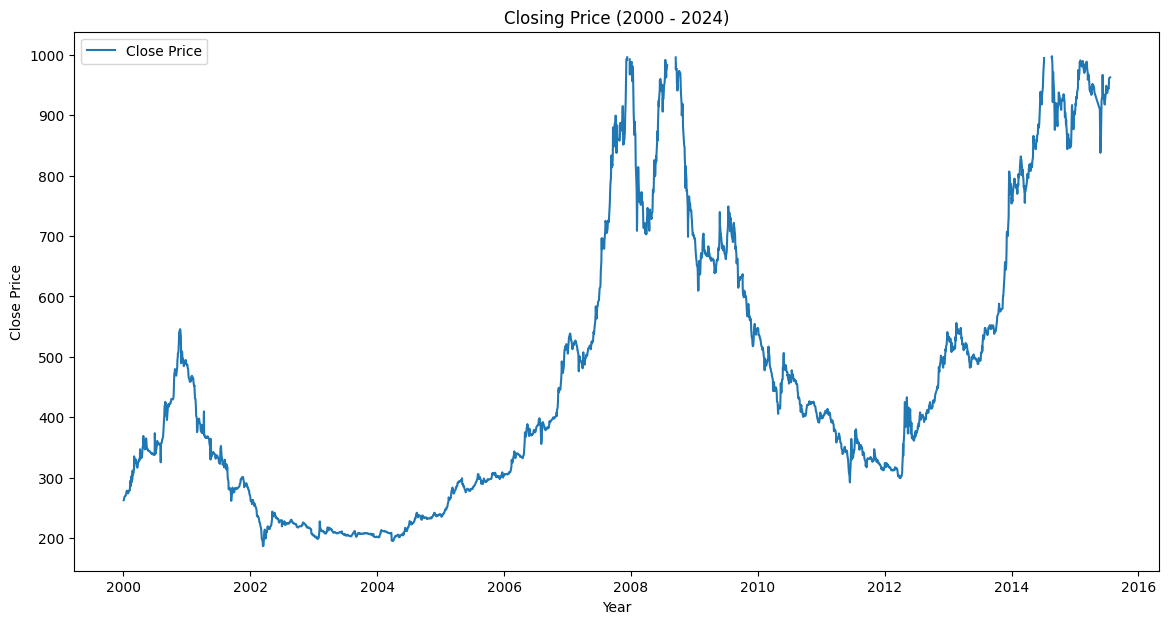

In [76]:
# Filter the DataFrame for dates between 2000 and 2024
filtered_df = df1.loc['2000-01-01':'2024-01-01']

# Now plot the closing price for this period
plt.figure(figsize=(14, 7))
plt.plot(filtered_df['close'], label='Close Price')
plt.title('Closing Price (2000 - 2024)')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [77]:
# Sort the DataFrame by the index (date) in ascending order
df1.sort_index(ascending=True, inplace=True)


In [79]:
df1.tail()

,open,high,low,close,change,pct_change,turnover
date,,,,,,,
2023-12-21,NaN,NaN,NaN,NaN,-32.77,-1.53,NaN
2023-12-24,NaN,NaN,NaN,NaN,-21.03,-0.99,NaN
2023-12-27,NaN,NaN,NaN,NaN,-17.23,-0.82,NaN
2023-12-28,NaN,NaN,NaN,NaN,-1.93,-0.09,NaN
2024-01-01,NaN,NaN,NaN,NaN,-8.75,-0.42,NaN
